In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Lemalabs/Data/'
data = pd.read_csv(path + 'golf_weather.csv')

In [ ]:
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
data.shape

(14, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

outlook_encoder = LabelEncoder()
data['OUTLOOK'] = outlook_encoder.fit_transform(data['OUTLOOK'])

temp_encoder = LabelEncoder()
data['TEMPERATURE'] = temp_encoder.fit_transform(data['TEMPERATURE'])

hum_encoder = LabelEncoder()
data['HUMIDITY'] = hum_encoder.fit_transform(data['HUMIDITY'])

windy_encoder = LabelEncoder()
data['WINDY'] = windy_encoder.fit_transform(data['WINDY'])

play_encoder = LabelEncoder()
data['PLAY GOLF'] = play_encoder.fit_transform(data['PLAY GOLF'])

In [ ]:
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [ ]:
input = data.drop(columns = ['PLAY GOLF'])
output = data['PLAY GOLF']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input,output,test_size = 0.25, random_state = 20)
x_train.shape, y_train.shape

((10, 4), (10,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
dtree.fit(input,output)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label = 'PLAY GOLF'
features = input.columns
features

Index(['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY'], dtype='object')

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graphviz as gr

export_graphviz(dtree, out_file = 'dtree.dot', feature_names = features, class_names = label, rounded = True, precision = 4, filled = True)

graph = gr.graph_from_dot_file('dtree.dot')

graph.write_png('tree.png')

True

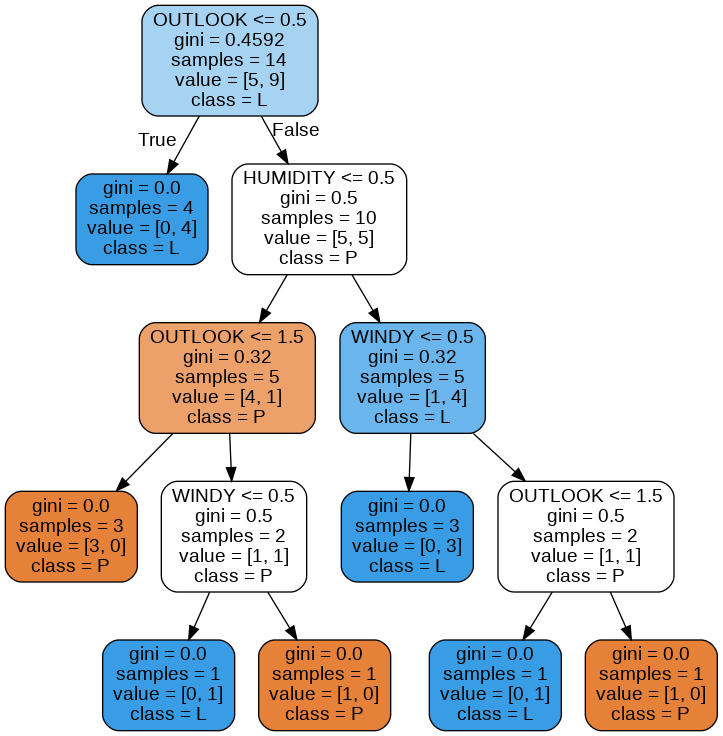

In [ ]:
from PIL import Image
from IPython.display import display

im = Image.open('tree.png')
display(im)

In [ ]:
y_pred1 = dtree.predict(x_train)
y_pred2 = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred1)*100
print('accuracy on train data = {}'.format(train_acc))

test_acc = accuracy_score(y_test,y_pred2)*100
print('accuracy on test data = {}'.format(test_acc))

accuracy on train data = 100.0
accuracy on test data = 100.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred1))
print('***********************************************************')
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

***********************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

